## Assignment - 3 4/20/2024

## TFIDF

In [1]:
import pandas as pd
file = "/Users/puttasathvik/Downloads/TextBasedAnalysis/Assignment/winemag-data-130k-v2.csv"
df = pd.read_csv(file)
df.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Get the stopwords

In [2]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'but', "mightn't", 'too', 'shouldn', 'should', "hadn't", "you'd", 'won', 'has', 're', 'down', 'ain', 'below', 've', 'have', "needn't", 'while', 'then', 'were', 'doesn', 'had', 'haven', 'who', 'theirs', 'how', 'after', 'until', "shouldn't", "wouldn't", 'own', 'more', 'herself', 'doing', 'wasn', 'am', 'me', 'over', 'through', 'with', "doesn't", "didn't", 'themselves', 'been', 'during', 'didn', 'there', "couldn't", 'will', 'as', 'against', "mustn't", 'being', 'himself', 'll', 'was', "don't", 'if', 'yours', 'can', 'in', 'ourselves', 'off', "won't", 'an', 'why', "you're", 'of', 'are', 'on', 'further', 'each', "isn't", 'a', 'shan', 'above', 'y', 'here', 'once', 'no', 'for', 'those', 'hers', 'just', 'our', "haven't", 'the', 'isn', "it's", 'other', 'this', 'yourself', 'what', 'before', 'now', "shan't", 'did', 'you', 'again', 'weren', 'is', 'and', 'up', 'hadn', 'so', 'aren', 'couldn', 'having', "you've", 'from', 'my', 'which', 'both', 'he', 'same', 'him', 'most', 's', 'because', 'we', "should'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/puttasathvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing pipeline

In [4]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)

## Now count the tokens

In [5]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
tokens,
wine,80255
flavors,62787
fruit,45169
aromas,39637
palate,38190
acidity,34988
finish,34972
tannins,30875
drink,29987


## Now draw the word cloud

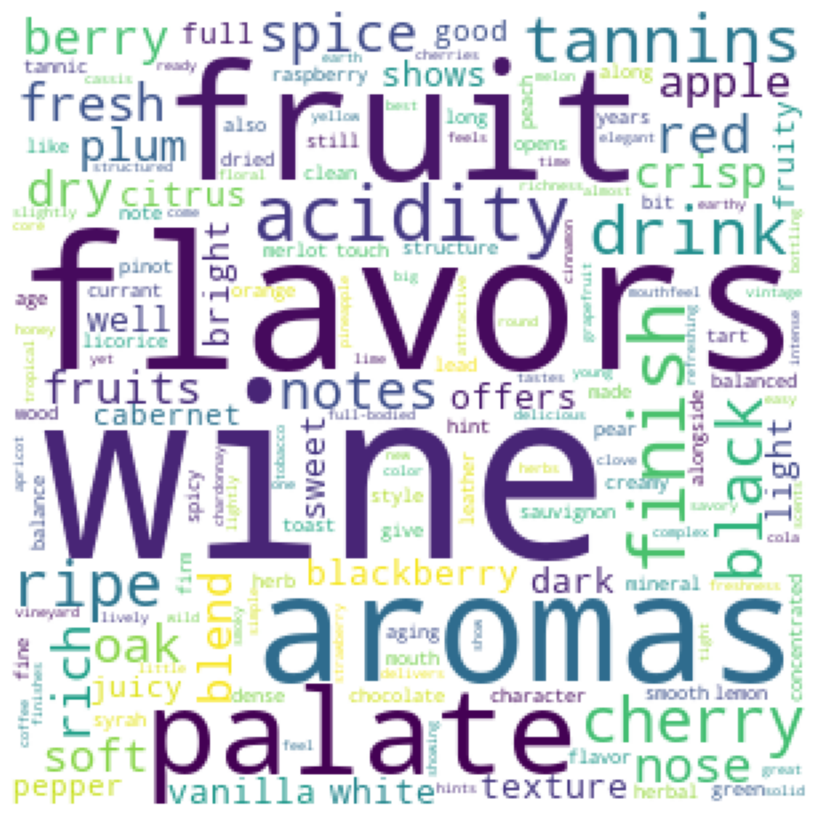

In [6]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Now let’s do the TFIDF and compare

In [7]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
 def update(doc):
   tokens = doc if preprocess is None else preprocess(doc)
   counter.update(set(tokens))
 # count tokens
 counter = Counter()
 df[column].map(update)
 # create data frame and compute idf
 idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
 idf_df = idf_df.query('df >= @min_df')
 idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
 idf_df.index.name = 'token'
 return idf_df
idf_df = compute_idf(df)

## TFIDF = TF * IDF

In [8]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
tokens,,
wine,80255,64089.296386
flavors,62787,55188.822326
fruit,45169,56899.763323
aromas,39637,51529.631902
palate,38190,51403.293110


## Let’s draw the word cloud

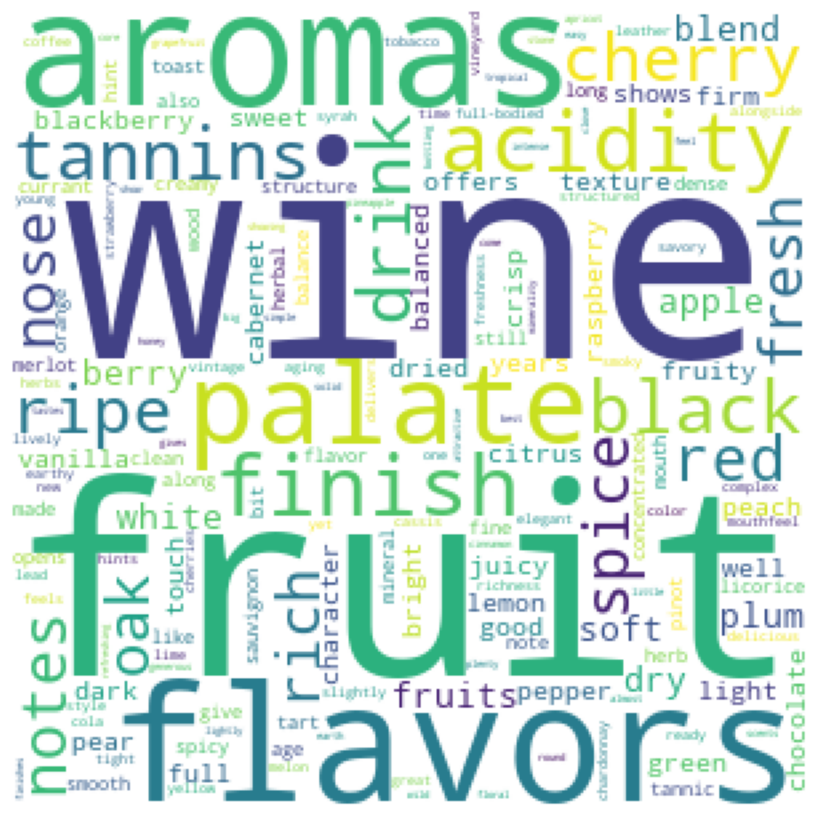

In [9]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Function to count the keywords

In [10]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## Function to group by description

In [11]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True)
# if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] 
# copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

## Draw

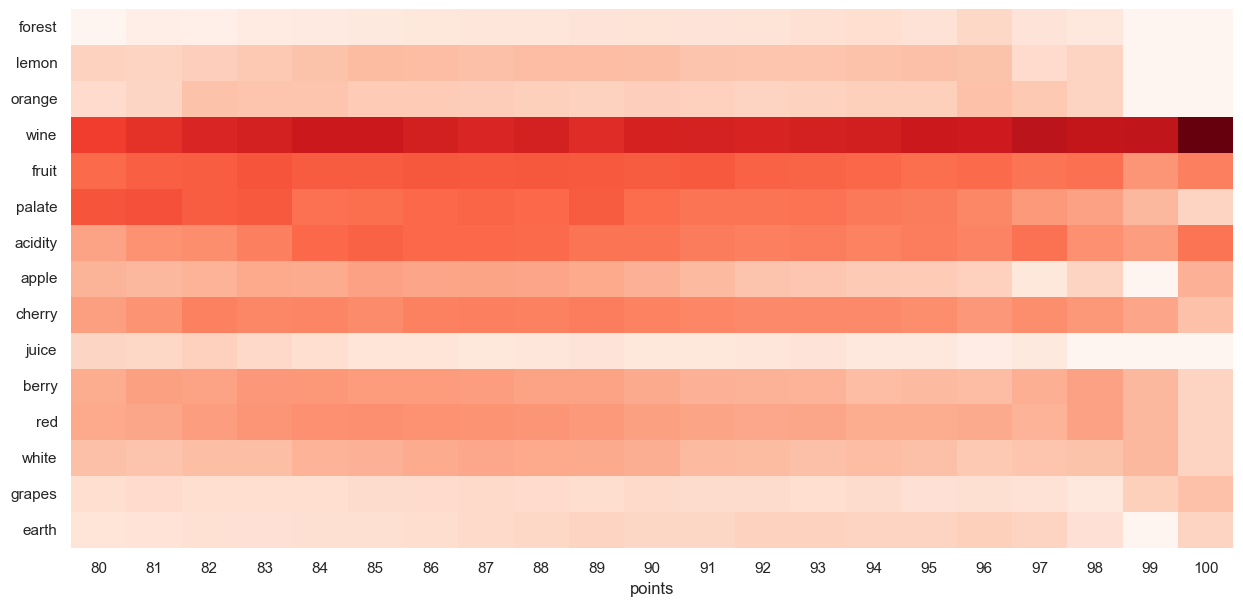

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined the count_keywords_by function and imported necessary libraries

keywords = ['forest', 'lemon', 'orange', 'wine', 'fruit', 'palate', 'acidity', 'apple', 'cherry',
            'juice', 'berry', 'red', 'white', 'grapes', 'earth']

freq_df = count_keywords_by(df, by='points', keywords=keywords)

# Compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('points')['num_tokens'].sum(), axis=0)

# Apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

## Points 87:

In [16]:
import pandas as pd
file = "/Users/puttasathvik/Downloads/TextBasedAnalysis/Assignment/winemag-data-130k-v2.csv"
df = pd.read_csv(file)
df= df[df['points']==87]
df.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Get the stopwords

In [17]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'but', "mightn't", 'too', 'shouldn', 'should', "hadn't", "you'd", 'won', 'has', 're', 'down', 'ain', 'below', 've', 'have', "needn't", 'while', 'then', 'were', 'doesn', 'had', 'haven', 'who', 'theirs', 'how', 'after', 'until', "shouldn't", "wouldn't", 'own', 'more', 'herself', 'doing', 'wasn', 'am', 'me', 'over', 'through', 'with', "doesn't", "didn't", 'themselves', 'been', 'during', 'didn', 'there', "couldn't", 'will', 'as', 'against', "mustn't", 'being', 'himself', 'll', 'was', "don't", 'if', 'yours', 'can', 'in', 'ourselves', 'off', "won't", 'an', 'why', "you're", 'of', 'are', 'on', 'further', 'each', "isn't", 'a', 'shan', 'above', 'y', 'here', 'once', 'no', 'for', 'those', 'hers', 'just', 'our', "haven't", 'the', 'isn', "it's", 'other', 'this', 'yourself', 'what', 'before', 'now', "shan't", 'did', 'you', 'again', 'weren', 'is', 'and', 'up', 'hadn', 'so', 'aren', 'couldn', 'having', "you've", 'from', 'my', 'which', 'both', 'he', 'same', 'him', 'most', 's', 'because', 'we', "should'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/puttasathvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing pipeline

In [18]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)

## Now count the tokens

In [19]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
tokens,
wine,9387
flavors,8257
aromas,5733
fruit,5615
palate,5012
acidity,4771
finish,4511
tannins,3758
cherry,3534


## Now draw the word cloud

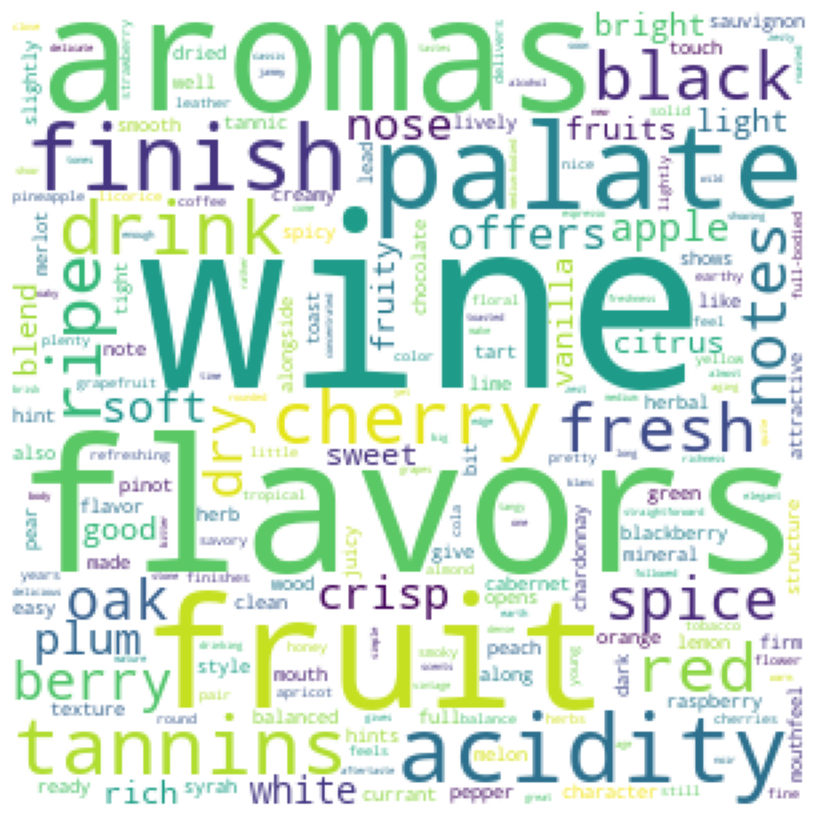

In [20]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Now let’s do the TFIDF and compare

In [21]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
 def update(doc):
   tokens = doc if preprocess is None else preprocess(doc)
   counter.update(set(tokens))
 # count tokens
 counter = Counter()
 df[column].map(update)
 # create data frame and compute idf
 idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
 idf_df = idf_df.query('df >= @min_df')
 idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
 idf_df.index.name = 'token'
 return idf_df
idf_df = compute_idf(df)

## TFIDF = TF * IDF

In [22]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
tokens,,
wine,9387,8248.702803
flavors,8257,7113.537097
aromas,5733,6864.876854
fruit,5615,7275.464391
palate,5012,6670.407727


## Let’s draw the word cloud

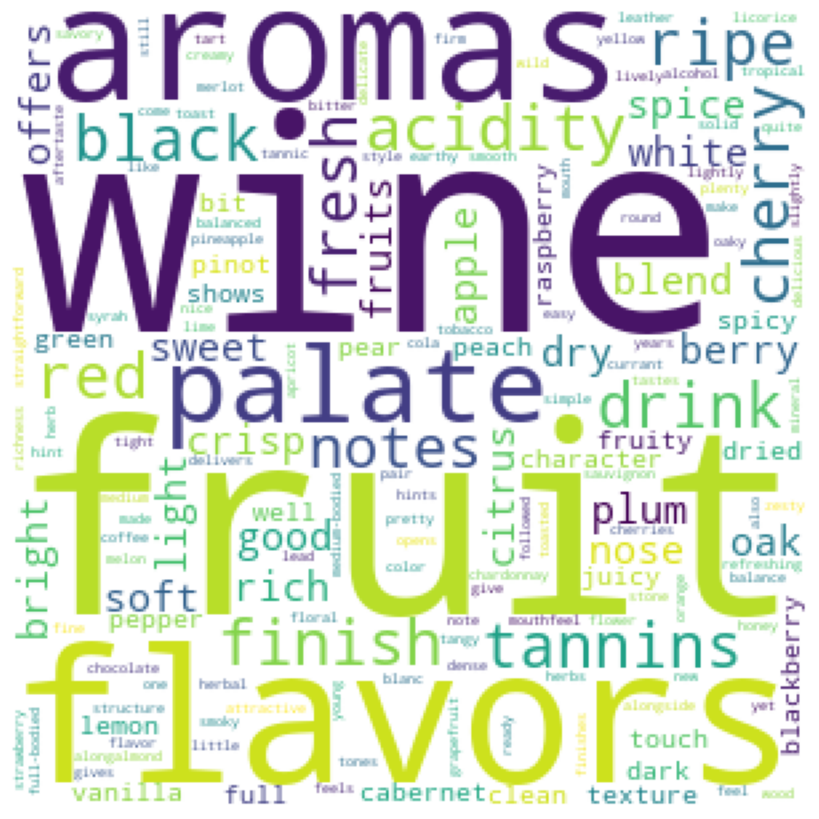

In [23]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Function to count the keywords

In [24]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## Function to group by description

In [25]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True)
# if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] 
# copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

## Draw

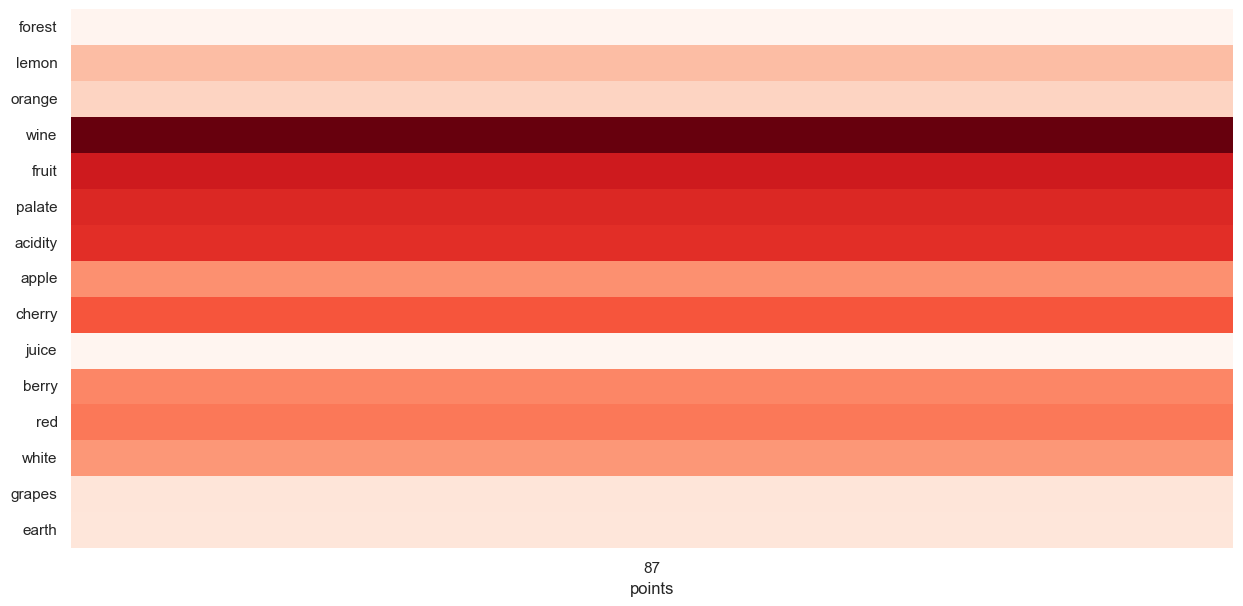

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined the count_keywords_by function and imported necessary libraries

keywords = ['forest', 'lemon', 'orange', 'wine', 'fruit', 'palate', 'acidity', 'apple', 'cherry',
            'juice', 'berry', 'red', 'white', 'grapes', 'earth']

freq_df = count_keywords_by(df, by='points', keywords=keywords)

# Compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('points')['num_tokens'].sum(), axis=0)

# Apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

## Points 92:

In [27]:
import pandas as pd
file = "/Users/puttasathvik/Downloads/TextBasedAnalysis/Assignment/winemag-data-130k-v2.csv"
df = pd.read_csv(file)
df= df[df['points']==92]
df.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
119,119,France,Medium-gold in color. Complex and inviting nos...,Schoenenbourg Grand Cru Vendanges Tardives,92,80.0,Alsace,Alsace,NaN,NaN,NaN,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Riesling,Dopff & Irion
120,120,Italy,"Slightly backward, particularly given the vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto
121,121,US,The vineyard is one of the better Chardonnay s...,Stuhlmuller Vineyard,92,36.0,California,Alexander Valley,Sonoma,NaN,NaN,Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...,Chardonnay,Matrix
122,122,US,Defines Rockpile Zinfandel in intensity of fru...,Rockpile Cemetary Vineyard,92,39.0,California,Rockpile,Sonoma,NaN,NaN,Mauritson 2007 Rockpile Cemetary Vineyard Zinf...,Zinfandel,Mauritson
123,123,Australia,The blend is roughly two-thirds Shiraz and one...,Parson's Flat,92,40.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 Parson's Flat Shi...,Shiraz-Cabernet Sauvignon,Henry's Drive Vignerons
124,124,US,This sophisticated wine is mostly Cabernet Sau...,NaN,92,45.0,California,Napa Valley,Napa,NaN,NaN,Silverado 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Silverado
280,280,Austria,"A strongly spicy, rich wine, this has great co...",Schiefer Reserve,92,24.0,Kremstal,NaN,NaN,Roger Voss,@vossroger,Forstreiter 2012 Schiefer Reserve Grüner Veltl...,Grüner Veltliner,Forstreiter
281,281,US,"This is another fine Pinot from Cambria, showi...",Bench Break Vineyard,92,34.0,California,Santa Maria Valley,Central Coast,NaN,NaN,Cambria 2011 Bench Break Vineyard Pinot Noir (...,Pinot Noir,Cambria
282,282,Italy,"This delicious blend of Cabernet Sauvignon, Me...",Dulcamara,92,41.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,I Giusti e Zanza 2009 Dulcamara Red (Toscana),Red Blend,I Giusti e Zanza
283,283,US,Bella Vida replaces the Abbey Ridge bottling a...,Bella Vida Vineyard Unfiltered,92,52.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwine,J. Christopher 2011 Bella Vida Vineyard Unfilt...,Pinot Noir,J. Christopher


## Get the stopwords

In [28]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'but', "mightn't", 'too', 'shouldn', 'should', "hadn't", "you'd", 'won', 'has', 're', 'down', 'ain', 'below', 've', 'have', "needn't", 'while', 'then', 'were', 'doesn', 'had', 'haven', 'who', 'theirs', 'how', 'after', 'until', "shouldn't", "wouldn't", 'own', 'more', 'herself', 'doing', 'wasn', 'am', 'me', 'over', 'through', 'with', "doesn't", "didn't", 'themselves', 'been', 'during', 'didn', 'there', "couldn't", 'will', 'as', 'against', "mustn't", 'being', 'himself', 'll', 'was', "don't", 'if', 'yours', 'can', 'in', 'ourselves', 'off', "won't", 'an', 'why', "you're", 'of', 'are', 'on', 'further', 'each', "isn't", 'a', 'shan', 'above', 'y', 'here', 'once', 'no', 'for', 'those', 'hers', 'just', 'our', "haven't", 'the', 'isn', "it's", 'other', 'this', 'yourself', 'what', 'before', 'now', "shan't", 'did', 'you', 'again', 'weren', 'is', 'and', 'up', 'hadn', 'so', 'aren', 'couldn', 'having', "you've", 'from', 'my', 'which', 'both', 'he', 'same', 'him', 'most', 's', 'because', 'we', "should'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/puttasathvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing pipeline

In [29]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)

## Now Count the Tokens

In [30]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
tokens,
wine,6790
flavors,4373
fruit,3649
palate,2955
drink,2911
black,2789
tannins,2785
acidity,2583
ripe,2534


## Now Draw the word Cloud

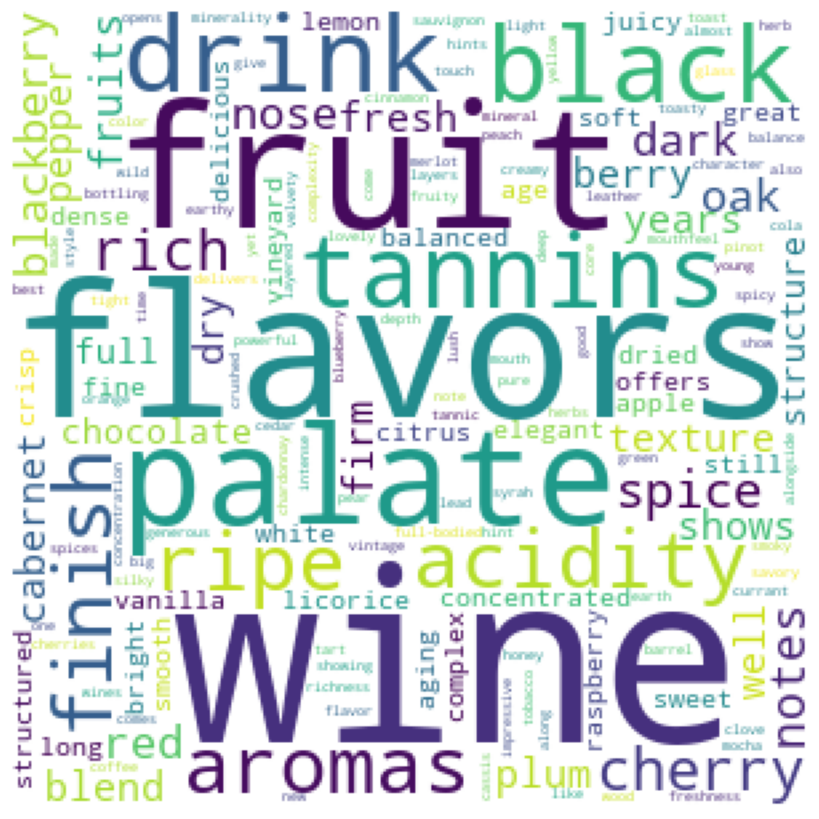

In [31]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Now let’s do the TFIDF and compare

In [32]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
 def update(doc):
   tokens = doc if preprocess is None else preprocess(doc)
   counter.update(set(tokens))
 # count tokens
 counter = Counter()
 df[column].map(update)
 # create data frame and compute idf
 idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
 idf_df = idf_df.query('df >= @min_df')
 idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
 idf_df.index.name = 'token'
 return idf_df
idf_df = compute_idf(df)

## TFIDF = TF * IDF

In [33]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
tokens,,
wine,6790,4793.955808
flavors,4373,4167.930182
fruit,3649,4314.248543
palate,2955,3864.429527
drink,2911,3788.706922


## Let’s draw the word cloud

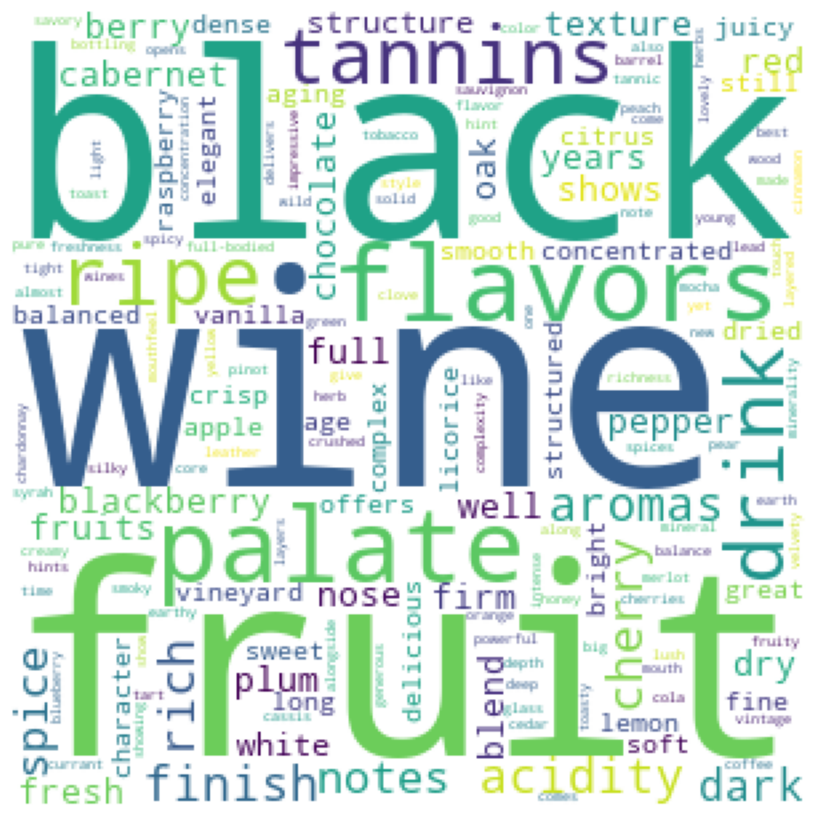

In [34]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Function to count the keywords

In [35]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## Function to group by description

In [36]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True)
# if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] 
# copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

## Draw

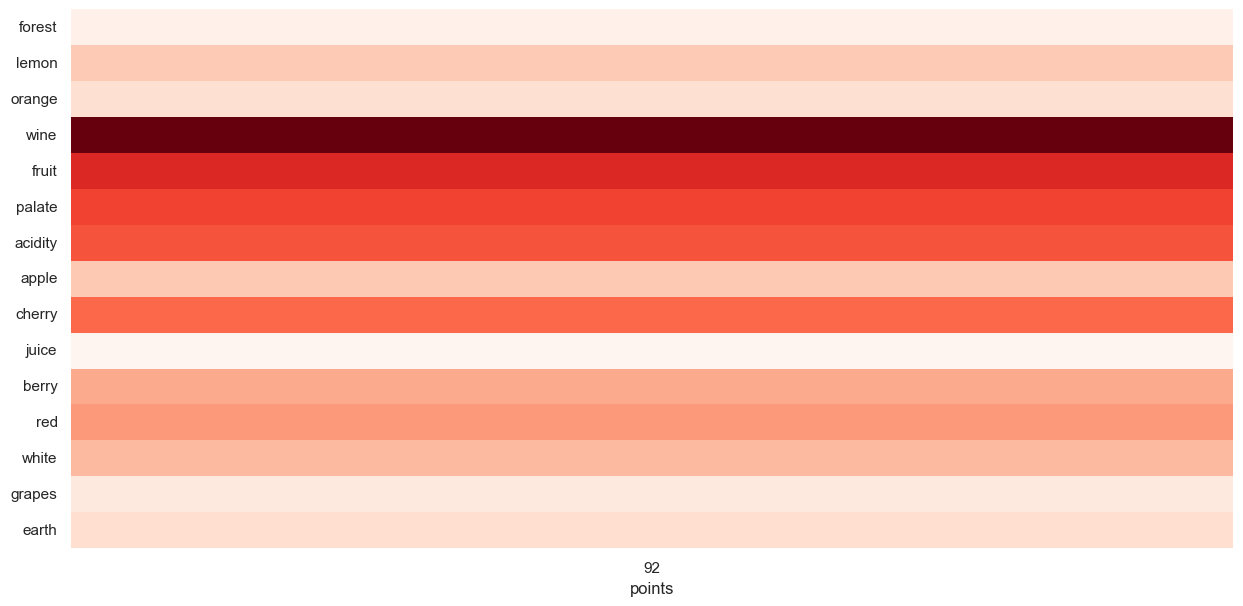

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined the count_keywords_by function and imported necessary libraries

keywords = ['forest', 'lemon', 'orange', 'wine', 'fruit', 'palate', 'acidity', 'apple', 'cherry',
            'juice', 'berry', 'red', 'white', 'grapes', 'earth']

freq_df = count_keywords_by(df, by='points', keywords=keywords)

# Compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('points')['num_tokens'].sum(), axis=0)

# Apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)